In [73]:
# code to enlarge font on lecture slides 

IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [74]:
library(tidyverse)

## Note on submitting homework
- Go to `File > Print Preview`: 
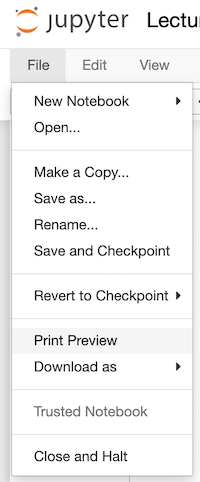
- Then [use the "Print to PDF" function of your browser](https://pdf.wondershare.com/pdf-knowledge/print-to-pdf-firefox-chrome-ie-safari.html#targetText=Print%20to%20PDF%20on%20Internet,press%20"Ctrl%20%2BP".). 
- **Proofread the resulting PDF**. Make sure no results or code are chopped off. We cannot give you credit for things do not show up in your PDF.
- Upload it to the corresponding Canvas assignment. One submission per group. (Make sure you have specified your group information correctly in Canvas _before submitting_ the assignment.)

## Important
**Do not use the "Download as PDF" feature in Jupyter**. It is broken. 
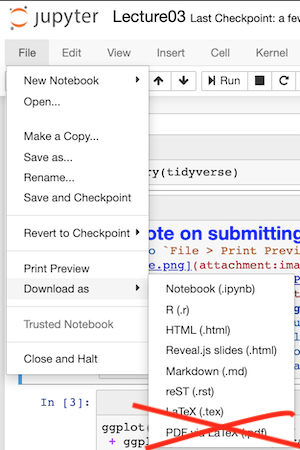

## Review Question

The `storms` dataset contains information on hurricanes in the US from 1975 to present:

In [118]:
print(storms)

# A tibble: 10,010 x 13
   name   year month   day  hour   lat  long status category  wind pressure
   <chr> <dbl> <dbl> <int> <dbl> <dbl> <dbl> <chr>  <ord>    <int>    <int>
 1 Amy    1975     6    27     0  27.5 -79   tropi… -1          25     1013
 2 Amy    1975     6    27     6  28.5 -79   tropi… -1          25     1013
 3 Amy    1975     6    27    12  29.5 -79   tropi… -1          25     1013
 4 Amy    1975     6    27    18  30.5 -79   tropi… -1          25     1013
 5 Amy    1975     6    28     0  31.5 -78.8 tropi… -1          25     1012
 6 Amy    1975     6    28     6  32.4 -78.7 tropi… -1          25     1012
 7 Amy    1975     6    28    12  33.3 -78   tropi… -1          25     1011
 8 Amy    1975     6    28    18  34   -77   tropi… -1          30     1006
 9 Amy    1975     6    29     0  34.4 -75.8 tropi… 0           35     1004
10 Amy    1975     6    29     6  34   -74.8 tropi… 0           40     1002
# … with 10,000 more rows, and 2 more variables: ts_diameter <db

Use an appropriate visualization to investigate whether the intensity of storms has changed over the past 40 years.

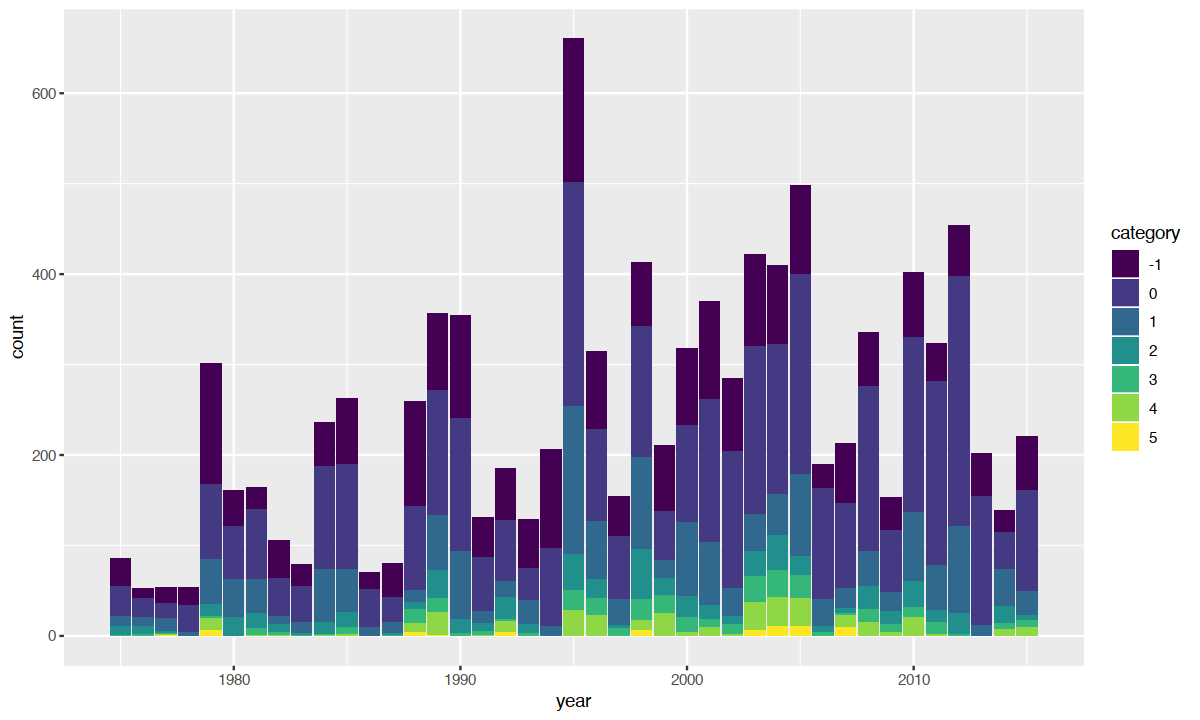

In [119]:
ggplot(storms) + geom_bar(aes(x=year, fill=category))

# Lecture 03:  Data transformation

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Learn [how to manipulate data](#Data-manipulation), including:
    * [Filtering data](#Filtering-data)
    * [Arranging (sorting) rows](#Arranging-rows)
    * [Selecting columns](#Selecting-columns)
</div>




## Data manipulation
Manipulating data is an important part of data science, and there are a lot of built-in commands for doing it in R:
```{r}
# Traditional data manipulation commands in R
subset()
aggregate()
merge()
reshape()
```
These commands are old and somewhat difficult to use. Instead of the traditional commands, we are going to focus on the `dplyr` package for filtering data. They provide a nice suite of replacements for the traditional commands, which have a consistent, unified interface and interoperate nicely with each other.

We will be using the `nycflights13` data set for this lecture. It does not come with tidyverse. If you are running Jupyter on your own computer you will first need to `install.packages("nycflights13")`.

In [123]:
library(nycflights13)
print(flights)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# … with 336,766 more rows,

### Filtering data
The first operation we'll learn about is filtering. Filtering is interpereted to mean "keep only the rows which match these criteria". The syntax for the `filter` command is 
```{r}
filter(<TIBBLE>, <LOGICAL CRITERIA>)
```
This commands returns a new tibble whose rows all match the specified criteria.

#### Types of logical criteria
For those who are new to programming, we now briefly review the sorts of logical operations that you can specify for commands like `filter()`. The basic logical operators in R are `>`, `>=`, `<`, `<=`, `!=` (not equal), and `==` (equal). The first four are used for comparing numbers and function exactly as in mathematics:
```{r}
> 1 > 1
[1] FALSE
> 1 >= 1
[1] TRUE
> 2.5 < 3
[1] TRUE
> 2.5 <= 3
[1] TRUE
```

In [132]:
day1 <- filter(flights, day == 1)

#### Assignment vs. equality
An extremely common mistake for beginner programmers is to confuse `=` and `==` ("double equals") when writing code. As we have seen,
- `=` is used for
    - assigning a value to a variable, and
    - passing a named parameter into a function. 
- `==` is used for testing equality. 


```{r}
> a = 2  # assigns the integer 1 to a
> b = 1  # assigns the integer 2 to b
> a == 1 # tests that a equals 1
[1] TRUE
> b == 1 # tests that b equals 1
[1] FALSE
> filter(flights, day = 1))
Error: ...
```

#### Boolean operations
Logical expressions are combined using *boolean operations*. The basic boolean operations are `and`, `or`, and `not`, denoted `&`, `|` and `!` respectively.


In [136]:
! FALSE

[1] TRUE

In [80]:
FALSE | TRUE

[1] TRUE

In [81]:
! TRUE

[1] FALSE

There are also doubled versions of `&` and `|` denoted `&&` and `||`. Do not use them here. We will return to these later in the course.

Another useful operator is `%in%`:
```r
x %in% y
```

return `TRUE` if the value `x` is found in the vector `y`:

In [141]:
"a" %in% c(1, 2, 3)
("a" == 1) | ("a" == 2) | ("a" == 3)

[1] FALSE

### Missing data
Something you will often encounter when working with real data are missing observations. R has a special value, `NA` , for representing missing data. You can think of the value of `NA` as "I don't know". Thus, logical and mathematical operations involving `NA` will again return `NA`, so that `NA`s "propagate through" the computation:

In [83]:
NA + 5 # 5 + I-don't-know = I-don't-know

[1] NA

In [84]:
1 < NA  # Is 1 less that I-don't-know? I don't know.

[1] NA

In [143]:
NA < NA  # Is I-don't-know greater than I-don't-know? I don't know.
mean(c(1, NA, 3), na.rm=F) # And so forth.

[1] NA

[1] NA

In [86]:
NA == 1

[1] NA

Since you cannot test `NA`s for equality, R has a special function for determining whether a value is `NA`:

In [144]:
5 == NA

is.na(NA)
is.na(1)

[1] NA

[1] TRUE

[1] FALSE

### Examples of filtering
Let's use what we have just learned to evaluate some simple queries on the `flights` dataset. Let's first construct narrow down to all flights that departed on December 31:

In [149]:
# all flights that departed on December 31
# sum((flights$month == 12) & (flights$day == 31))
print(filter(flights, month == 12 & day == 31)) 

# A tibble: 776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12    31       13           2359        14      439            437
 2  2013    12    31       18           2359        19      449            444
 3  2013    12    31       26           2245       101      129           2353
 4  2013    12    31      459            500        -1      655            651
 5  2013    12    31      514            515        -1      814            812
 6  2013    12    31      549            551        -2      925            900
 7  2013    12    31      550            600       -10      725            745
 8  2013    12    31      552            600        -8      811            826
 9  2013    12    31      553            600        -7      741            754
10  2013    12    31      554            550         4     1024           1027
# … with 766 more rows, and 11 

As we have already seen, instead of typing `&` we can provide additional arguments to `filter()`. It will `AND` them together:

In [89]:
print(filter(flights, month == 12, day == 31)) # multiple arguments are equivalent to `&`

# A tibble: 776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12    31       13           2359        14      439            437
 2  2013    12    31       18           2359        19      449            444
 3  2013    12    31       26           2245       101      129           2353
 4  2013    12    31      459            500        -1      655            651
 5  2013    12    31      514            515        -1      814            812
 6  2013    12    31      549            551        -2      925            900
 7  2013    12    31      550            600       -10      725            745
 8  2013    12    31      552            600        -8      811            826
 9  2013    12    31      553            600        -7      741            754
10  2013    12    31      554            550         4     1024           1027
# … with 766 more rows, and 11 

Let's filter down to all flights which were in the last quarter of the year (October through December). That is, we want flights whose `month` is 10, 11, or 12.

In [155]:
print(filter(flights, month %in% c(10, 11, 12)))

# A tibble: 84,292 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    10     1      447            500       -13      614            648
 2  2013    10     1      522            517         5      735            757
 3  2013    10     1      536            545        -9      809            855
 4  2013    10     1      539            545        -6      801            827
 5  2013    10     1      539            545        -6      917            933
 6  2013    10     1      544            550        -6      912            932
 7  2013    10     1      549            600       -11      653            716
 8  2013    10     1      550            600       -10      648            700
 9  2013    10     1      550            600       -10      649            659
10  2013    10     1      551            600        -9      727            730
# … with 84,282 more rows, a

We can save some typing by using the `%in%` operator as well as the `:` (colon) operator. The colon operator takes two integers and returns a vector of all the integers between them: `a:b = c(a,a+1,...,b-1,b)`.

In [157]:
print(filter(flights, month %in% 10:12))

# A tibble: 84,292 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    10     1      447            500       -13      614            648
 2  2013    10     1      522            517         5      735            757
 3  2013    10     1      536            545        -9      809            855
 4  2013    10     1      539            545        -6      801            827
 5  2013    10     1      539            545        -6      917            933
 6  2013    10     1      544            550        -6      912            932
 7  2013    10     1      549            600       -11      653            716
 8  2013    10     1      550            600       -10      648            700
 9  2013    10     1      550            600       -10      649            659
10  2013    10     1      551            600        -9      727            730
# … with 84,282 more rows, a

Finally, because the above pattern occurs so ofter, there is a special `between()` function:

In [92]:
between(1, left = 1, right = 10)
print(filter(flights, between(month, 10, 12)))

[1] TRUE

# A tibble: 84,292 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    10     1      447            500       -13      614            648
 2  2013    10     1      522            517         5      735            757
 3  2013    10     1      536            545        -9      809            855
 4  2013    10     1      539            545        -6      801            827
 5  2013    10     1      539            545        -6      917            933
 6  2013    10     1      544            550        -6      912            932
 7  2013    10     1      549            600       -11      653            716
 8  2013    10     1      550            600       -10      648            700
 9  2013    10     1      550            600       -10      649            659
10  2013    10     1      551            600        -9      727            730
# … with 84,282 more rows, a

### Counting matches
Sometimes we just want to know how many observations match a given filter. The `nrow()` command can be used to count the number of rows in a data table.

In [159]:
nrow(filter(flights, is.na(dep_time)))

[1] 8255

In [94]:
nrow(filter(flights, between(month, 10, 12))) # no. of flights departing between Jan and Mar

[1] 84292

### Exercise

<table class="table-condensed">
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr><td>How many flights were there in 
        months beginning with the letter <code>J</code>?</td>
        <td>How many flights departed on a Monday?</td>
    </tr>
<tr><td>

1. 27,004
2. 57,668
3. 84,672
4. 93,101

</td><td>

1. 46,537
2. 51,812
3. 80,100
4. 101,991

</td>
    </tr></table>

In [160]:
nrow(filter(flights, month %in% c(1, 6, 7)))

[1] 84672

### Exercise

<table class="table-condensed">
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr><td>
What proportion of the flights have a missing departure time?
        </td>
        <td>
Of all the flights that departed in the first week of January, how many have a missing departure time?
        </td>
    </tr>
<tr><td>

1. 0.003
2. 0.025
3. 0.081
4. 0.105


</td><td>

1. None
2. 35
3. 101
4. 6,064

</td>
    </tr></table>
    
    


In [164]:
## Solution (your code here)
print(filter(flights, is.na(dep_time)))
8255 / nrow(flights)

# A tibble: 8,255 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1       NA           1630        NA       NA           1815
 2  2013     1     1       NA           1935        NA       NA           2240
 3  2013     1     1       NA           1500        NA       NA           1825
 4  2013     1     1       NA            600        NA       NA            901
 5  2013     1     2       NA           1540        NA       NA           1747
 6  2013     1     2       NA           1620        NA       NA           1746
 7  2013     1     2       NA           1355        NA       NA           1459
 8  2013     1     2       NA           1420        NA       NA           1644
 9  2013     1     2       NA           1321        NA       NA           1536
10  2013     1     2       NA           1545        NA       NA           1910
# … with 8,245 more rows, and

[1] 0.02451184

## Arranging rows
`arrange` can order rows of a data frame using a variable name (or a more complicated expression). If you provide multiple expressions to order by, it uses the second one to break ties in the first one, third one to break ties in the second one, and so on.

In [165]:
print(arrange(flights, dep_time, arr_time))  # sorts by departure time, then arrival time

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     6    24        1           1950       251      105           2130
 2  2013     4    10        1           1930       271      106           2101
 3  2013     1    13        1           2249        72      108           2357
 4  2013     2    11        1           2100       181      111           2225
 5  2013     3    19        1           2250        71      120              5
 6  2013     2    24        1           2245        76      121           2354
 7  2013     1    31        1           2100       181      124           2225
 8  2013     7    22        1           2305        56      135             13
 9  2013     5    22        1           1935       266      154           2140
10  2013     7     1        1           2029       212      236           2359
# … with 336,766 more rows,

Note the difference between this table and 

In [98]:
print(arrange(flights, arr_time, dep_time))  # sorts by arrival time, then departure time

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12     8     1909           1804        65        1           2125
 2  2013    11    15     1929           1932        -3        1             28
 3  2013    12    14     1944           1815        89        1           2058
 4  2013    12     8     1957           1930        27        1           2301
 5  2013     7    28     2007           1940        27        1           2255
 6  2013     6    26     2008           1819       109        1           2118
 7  2013     5    22     2013           2020        -7        1           2245
 8  2013     1    16     2018           2025        -7        1           2329
 9  2013     6    24     2018           1711       187        1           2039
10  2013     7    12     2020           2007        13        1           2359
# … with 336,766 more rows,

In the first we sorted by departure time then arrival time. So the top-most rows have the earliest departure times. In the second we sorted by arrival time, so the top-most rows have the earliest arrival times.

The default order is *ascending*. `desc()` will order in descending order.

In [166]:
print(arrange(flights, desc(month), desc(day)))

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12    31       13           2359        14      439            437
 2  2013    12    31       18           2359        19      449            444
 3  2013    12    31       26           2245       101      129           2353
 4  2013    12    31      459            500        -1      655            651
 5  2013    12    31      514            515        -1      814            812
 6  2013    12    31      549            551        -2      925            900
 7  2013    12    31      550            600       -10      725            745
 8  2013    12    31      552            600        -8      811            826
 9  2013    12    31      553            600        -7      741            754
10  2013    12    31      554            550         4     1024           1027
# … with 336,766 more rows,

You can mix ascending and descending order for different columns:

In [100]:
print(arrange(flights, desc(month), day))

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12     1       13           2359        14      446            445
 2  2013    12     1       17           2359        18      443            437
 3  2013    12     1      453            500        -7      636            651
 4  2013    12     1      520            515         5      749            808
 5  2013    12     1      536            540        -4      845            850
 6  2013    12     1      540            550       -10     1005           1027
 7  2013    12     1      541            545        -4      734            755
 8  2013    12     1      546            545         1      826            835
 9  2013    12     1      549            600       -11      648            659
10  2013    12     1      550            600       -10      825            854
# … with 336,766 more rows,

Missing values are always left at the end by `arrange`, regardless of which order you sort:

In [168]:
# print(arrange(flights, dep_delay))  # NA values of dep_delay will occur last
print(tail(arrange(flights, desc(dep_delay))))

# A tibble: 6 x 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     9    30       NA           1842        NA       NA           2019
2  2013     9    30       NA           1455        NA       NA           1634
3  2013     9    30       NA           2200        NA       NA           2312
4  2013     9    30       NA           1210        NA       NA           1330
5  2013     9    30       NA           1159        NA       NA           1344
6  2013     9    30       NA            840        NA       NA           1020
# … with 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>


### Exercise

<table class="table-condensed">
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr><td>
        What time did the first flight depart on the last day in February?
<td>
 
 Of all the flights that departed on or ahead of schedule in the first 15 days of any month, which one was in the air for the *second* shortest amount of time?

</td>
    </tr>
<tr><td>

1. 4:15am
2. 4:57am
3. 5:01am
4. 5:40am

</td><td>

1. EV 4118
2. HA 51
3. EV 4631
4. EV 4619

</td>
    </tr></table>


In [177]:
## Solution (your code here)
answer <- arrange(filter(flights, month == 2),
      desc(day),
      dep_time)
print(slice(answer, 10:20))

# A tibble: 11 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     2    28      552            600        -8      848            901
 2  2013     2    28      553            600        -7      726            724
 3  2013     2    28      553            600        -7      656            708
 4  2013     2    28      553            600        -7      645            703
 5  2013     2    28      554            600        -6      656            659
 6  2013     2    28      555            600        -5      733            759
 7  2013     2    28      555            600        -5      712            723
 8  2013     2    28      555            600        -5      709            735
 9  2013     2    28      555            600        -5      829            906
10  2013     2    28      556            605        -9      808            821
11  2013     2    28      556   

## Selecting columns
`select` is used to keep only a few variables of interest to the current analysis. It is most useful when working with data frames involving a large number of variables.

In [103]:
select(flights, year, month, day, dep_time, arr_time)  %>% print

# A tibble: 336,776 x 5
    year month   day dep_time arr_time
   <int> <int> <int>    <int>    <int>
 1  2013     1     1      517      830
 2  2013     1     1      533      850
 3  2013     1     1      542      923
 4  2013     1     1      544     1004
 5  2013     1     1      554      812
 6  2013     1     1      554      740
 7  2013     1     1      555      913
 8  2013     1     1      557      709
 9  2013     1     1      557      838
10  2013     1     1      558      753
# … with 336,766 more rows


You can change the name of the variables when selecting them.

In [104]:
print(select(flights, year, month, day, 
             departure_time = dep_time, 
             arrival_time = arr_time))

# A tibble: 336,776 x 5
    year month   day departure_time arrival_time
   <int> <int> <int>          <int>        <int>
 1  2013     1     1            517          830
 2  2013     1     1            533          850
 3  2013     1     1            542          923
 4  2013     1     1            544         1004
 5  2013     1     1            554          812
 6  2013     1     1            554          740
 7  2013     1     1            555          913
 8  2013     1     1            557          709
 9  2013     1     1            557          838
10  2013     1     1            558          753
# … with 336,766 more rows


Note that `select` drops any variables not explicitly mentioned. To just rename some variables while keeping all others, use `rename`.

In [105]:
print(rename(flights, departure_time = dep_time, arrival_time = arr_time))

# A tibble: 336,776 x 19
    year month   day departure_time sched_dep_time dep_delay arrival_time
   <int> <int> <int>          <int>          <int>     <dbl>        <int>
 1  2013     1     1            517            515         2          830
 2  2013     1     1            533            529         4          850
 3  2013     1     1            542            540         2          923
 4  2013     1     1            544            545        -1         1004
 5  2013     1     1            554            600        -6          812
 6  2013     1     1            554            558        -4          740
 7  2013     1     1            555            600        -5          913
 8  2013     1     1            557            600        -3          709
 9  2013     1     1            557            600        -3          838
10  2013     1     1            558            600        -2          753
# … with 336,766 more rows, and 12 more variables: sched_arr_time <int>,
#   arr_delay 

If there are a lot of variables, you can save yourself some typing by using `:` and `-` in combination with select. The colon operator selects a range of variables:

In [183]:
print(select(flights, year:dep_time))

# A tibble: 336,776 x 4
    year month   day dep_time
   <int> <int> <int>    <int>
 1  2013     1     1      517
 2  2013     1     1      533
 3  2013     1     1      542
 4  2013     1     1      544
 5  2013     1     1      554
 6  2013     1     1      554
 7  2013     1     1      555
 8  2013     1     1      557
 9  2013     1     1      557
10  2013     1     1      558
# … with 336,766 more rows


The negative sign lets you select everything but certain columns:

In [107]:
print(select(flights, -day))

# A tibble: 336,776 x 18
    year month dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1      517            515         2      830            819
 2  2013     1      533            529         4      850            830
 3  2013     1      542            540         2      923            850
 4  2013     1      544            545        -1     1004           1022
 5  2013     1      554            600        -6      812            837
 6  2013     1      554            558        -4      740            728
 7  2013     1      555            600        -5      913            854
 8  2013     1      557            600        -3      709            723
 9  2013     1      557            600        -3      838            846
10  2013     1      558            600        -2      753            745
# … with 336,766 more rows, and 11 more variables: arr_delay <dbl>,
#   carrier <chr>, flight <int>

You can use `-` and `:` together, for example:

In [108]:
print(select(flights, -(year:month)))  # select everything EXCEPT the variables between year and month

# A tibble: 336,776 x 17
     day dep_time sched_dep_time dep_delay arr_time sched_arr_time arr_delay
   <int>    <int>          <int>     <dbl>    <int>          <int>     <dbl>
 1     1      517            515         2      830            819        11
 2     1      533            529         4      850            830        20
 3     1      542            540         2      923            850        33
 4     1      544            545        -1     1004           1022       -18
 5     1      554            600        -6      812            837       -25
 6     1      554            558        -4      740            728        12
 7     1      555            600        -5      913            854        19
 8     1      557            600        -3      709            723       -14
 9     1      557            600        -3      838            846        -8
10     1      558            600        -2      753            745         8
# … with 336,766 more rows, and 10 more variables: 

If you want to bring a few variables at the beginning, you can use `everything()` to refer to the remaining variables.

In [185]:
print(select(flights, time_hour, everything()))

# A tibble: 336,776 x 19
   time_hour            year month   day dep_time sched_dep_time dep_delay
   <dttm>              <int> <int> <int>    <int>          <int>     <dbl>
 1 2013-01-01 05:00:00  2013     1     1      517            515         2
 2 2013-01-01 05:00:00  2013     1     1      533            529         4
 3 2013-01-01 05:00:00  2013     1     1      542            540         2
 4 2013-01-01 05:00:00  2013     1     1      544            545        -1
 5 2013-01-01 06:00:00  2013     1     1      554            600        -6
 6 2013-01-01 05:00:00  2013     1     1      554            558        -4
 7 2013-01-01 06:00:00  2013     1     1      555            600        -5
 8 2013-01-01 06:00:00  2013     1     1      557            600        -3
 9 2013-01-01 06:00:00  2013     1     1      557            600        -3
10 2013-01-01 06:00:00  2013     1     1      558            600        -2
# … with 336,766 more rows, and 12 more variables: arr_time <int>,
#   sche

In addition, there are some helper functions that only work inside `select()`.

* `starts_with()`, `ends_with()`, `contains()`
* `matches()`
* `num_range()`

These match *column names* (not variable values -- for that you'd use `filter()`).

You can consult the documentation or type `?select_helpers` at the prompt to learn more about these.

In [110]:
# select all the columns containing the string "time"
print(select(flights, contains("time")))

# A tibble: 336,776 x 6
   dep_time sched_dep_time arr_time sched_arr_time air_time time_hour          
      <int>          <int>    <int>          <int>    <dbl> <dttm>             
 1      517            515      830            819      227 2013-01-01 05:00:00
 2      533            529      850            830      227 2013-01-01 05:00:00
 3      542            540      923            850      160 2013-01-01 05:00:00
 4      544            545     1004           1022      183 2013-01-01 05:00:00
 5      554            600      812            837      116 2013-01-01 06:00:00
 6      554            558      740            728      150 2013-01-01 05:00:00
 7      555            600      913            854      158 2013-01-01 06:00:00
 8      557            600      709            723       53 2013-01-01 06:00:00
 9      557            600      838            846      140 2013-01-01 06:00:00
10      558            600      753            745      138 2013-01-01 06:00:00
# … with 336,766

### Exercise

<table class="table-condensed">
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr><td>
        How many columns in flights contain the word time?
<td>
    
How many column names in flights do *not* contain `s`?

</td>
    </tr>
<tr><td>

1. 0
2. 2
3. 4
4. 6

</td><td>

1. 0
2. 1
3. 2
4. 3

</td>
    </tr></table>

In [188]:
ncol(select(flights, contains("time")))

[1] 6